# Lasso Regresyon

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.

Ridge regresyondan farkı ise katsayıların cezalarını onları sıfır yapacak şekilde uygulamaktadır ve böylece değişken seçimi yapmaktadır.

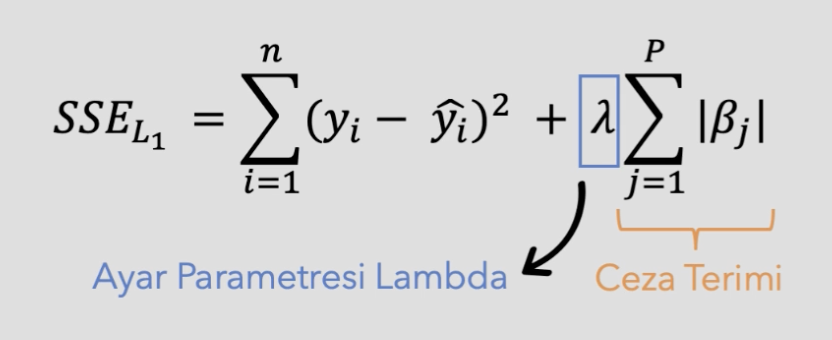

Hata Kareler Toplamı - HKT

* Ridge regresyonu ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
* Lasso'da katsayıları sıfıra yaklaştırır.
* Fakat L1 normu lambda yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar. Böylece değişken seçimi yapmış olur.
* lambda'nın doğru seçilmesi çok önemlidir, burada da CV kullanılır.
* Ridge ve Lasso yöntemleri birbirinden üstün değildir.

* Fakat L1 normu lambda yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar. Böylece değişken seçimi yapmış olur.

bu düzenlileştirme işleminin L2 normu anlamıyla ve L1 normu anlamıyla bu iki katkısı etkisini bir çok yöntemde gösterecektir.

**lambda** Ayar Parametresinin Belirlenmesi
* lambda'nın sıfır olduğu yer EKK'dır. HKT'yi minimum yapan lambda'yı arıyoruz.
* lambda için belirli değerleri içeren bir küme seçilir ve her birisi için cross validation test hatası hesaplanır.
* En küçük cross validation'ı veren lambda, ayar parametresi olarak seçilir.
* Son olarak seçilen bu lambda ile model yeniden tüm gözlemlere fit edilir.

# Lasso Regresyon - Model

In [1]:
import pandas as pd

In [2]:
hit = pd.read_csv("Hitters.csv")
hit.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df = hit.copy()

In [4]:
df = df.dropna()

In [5]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [6]:
y = df["Salary"]

In [7]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")

In [8]:
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [10]:
from sklearn.linear_model import Lasso

In [11]:
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388035, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [12]:
# modelin katsayıları
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

* Bu katsayılara seçilecek olan lambda değerini farklı değerlerinde katsayıların etkilerinin ne şekilde olacağına göz atalım: 

In [13]:
lasso = Lasso() # lasso model nesnesi oluşturuyoruz

In [14]:
import numpy as np

In [15]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [16]:
katsayilar=[]

In [17]:
for i in lambdalar:
    lasso.set_params(alpha=i) # lasso model nesnesine yeni lambda değerini gönder
    lasso.fit(X_train, y_train) # lasso model nesnesini eğit
    katsayilar.append(lasso.coef_) # her bir lambda için değişken sayısı kadar katsayı hesapla
    # bu katsayıları ekle

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679552436, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137493998, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarnin

Text(0, 0.5, 'katsayılar')

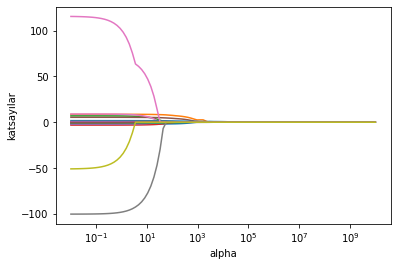

In [18]:
import matplotlib.pyplot as plt

# görselleştirme
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale("log")

plt.axis("tight")
plt.xlabel("alpha") # lambda
plt.ylabel("katsayılar")

* katsayıların, farklı lambda değerlerine karşı aldığı değerler gösterilmiştir.
* bu katsayılar sıfır olmuş

# Lasso Regresyon - Tahmin

In [19]:
# y değerlerini tahmin edelim
y_predict = lasso_model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
# rmse test hatası hesaplayalım
np.sqrt(mean_squared_error(y_test, y_predict))

356.75452701487706

# Lasso Regresyon - Model Tuning

optimum lambda değerinin bulunması ve final modelinin oluşturulması

In [21]:
from sklearn.linear_model import LassoCV

In [22]:
lasso_cv_model = LassoCV(alphas = None,
                         cv = 10,
                         max_iter = 10000,
                        normalize = True)

In [23]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [24]:
# optimum lambda değeri
lasso_cv_model.alpha_

0.39406126432470073

In [27]:
# final modelini oluşturdum
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_)

In [28]:
lasso_tuned.fit(X_train, y_train) # modeli eğittim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523998, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.39406126432470073)

In [29]:
# tahmin edilen y değerleri
y_pred = lasso_tuned.predict(X_test)

In [30]:
# final modelin rmse test hatasına bakalım
np.sqrt(mean_squared_error(y_test, y_pred))

356.5226376958367

* final modeli test hatası ridge: 386.6826429756415
* final modeli test hatası lasso: 356.5226376958367
* Ridge regresyona göre lasso daha başarılıdır.
* makine öğrenmesi algoritmalarını ele aldığımızda cross validation yöntemiyle doğrulanıp yine cross validation yöntemiyle bulunmuş olan optimum parametre değerleriyle oluşturulan final modellerinin test hataları üzerinden değerlendirme yapacağız.